# 📘 Métodos Numéricos — Fatoração LU (Resumo Teórico + Referências)

---

> ##### **Objetivo:** apresentar a estrutura da decomposição **LU**, sua ideia central, entradas/saídas e, em seguida, caracterizar o método (tipo, requisitos, simetria/definição positiva, possíveis problemas e qualidades) **com apontamentos exatos para os livros**.

---

<details>
<summary><strong>1) Estrutura da Fatoração LU</strong></summary>

## 🔹 Nome
**LU Factorization** (*decomposição LU*).

## 🔹 Ideia central
Escrever uma matriz quadrada \(A \in \mathbb{R}^{n\times n}\) como
\[
A = L\,U,
\]
onde:
- \(L\) é **triangular inferior** com 1’s na diagonal (unit lower-triangular),  
- \(U\) é **triangular superior**.

Essa fatoração permite resolver \(Ax=b\) em duas etapas:
1. **Forward substitution**: resolver \(Ly=b\),  
2. **Backward substitution**: resolver \(Ux=y\).

### 🔹 Entrada
- Matriz quadrada \(A\) e (para o problema linear) o vetor \(b\).

### 🔹 Saída
- Matrizes \(L\) e \(U\) (e, na prática, um vetor de **pivôs** se houver pivotamento), e a solução \(x\) ao aplicar forward/backward substitution.

**Onde encontrar nos livros:**
- **Golub & Van Loan, _Matrix Computations_ (4ª ed.)**  
  - **Cap. 3 – “General Linear Systems”**  
  - **§3.2 “The LU Factorization” — pp. ~111–122** (estrutura \(A=LU\), papel dos menores principais, forma de \(L\)/\(U\)).  
  - Página da editora: <https://www.press.jhu.edu/books/title/10678/matrix-computations>  
  - Preview (Google Books): <https://books.google.com/books/about/Matrix_Computations.html?id=X5YfsuCWpxMC>

- **Trefethen & Bau, _Numerical Linear Algebra_ (SIAM, 1997)**  
  - **Cap. 2 “Elimination, LU and Pivoting” — pp. ~21–33** (eliminação gaussiana, \(LU\) e ideia algorítmica).  
  - DOI (SIAM): <https://epubs.siam.org/doi/10.1137/1.9780898719574>

</details>
<details>
<summary><strong>2) Características do Método LU</strong></summary>

### 🔹 Tipo do método
- **Direto** (não iterativo). Uma vez fatorado \(A=LU\), várias soluções para diferentes \(b\) são baratas (duas triangulares).

### 🔹 Requisitos (existência/robustez)
- **Sem pivotamento**, a existência de \(LU\) com \(L\) unitária exige que **todos os menores principais** de \(A\) sejam não nulos.  
- **Na prática**, utiliza-se **pivotamento parcial** (troca de linhas) para evitar divisões por números muito pequenos e reduzir crescimento numérico.

**Onde encontrar:**
- **Golub & Van Loan** — §3.2 (condições de existência, construção), §3.3 (aspectos numéricos), pp. ~111–130.  
- **Trefethen & Bau** — Cap. 2 (eliminação + pivotamento), pp. ~21–33.

### 🔹 Simetria / Definida Positiva (SPD)
- Para matrizes **simétricas definidas positivas (SPD)**, recomenda-se **Cholesky**: \(A = R^\mathsf{T}R\) (ou \(A = LL^\mathsf{T}\)),  
  com **~metade** do custo flutuante de LU e boa estabilidade.

**Onde encontrar:**
- **Trefethen & Bau** — menção e comparação com Cholesky no final do Cap. 2 (pp. ~31–33).  
- **Golub & Van Loan** — seção de **Cholesky** (ver capítulos de fatorações diretas; na 4ª ed., Cholesky é tratado no bloco de fatorações diretas, tipicamente indicado como **§4.2 Cholesky Factorization**).  
  - Página da editora: <https://www.press.jhu.edu/books/title/10678/matrix-computations>  
  - Preview (Google Books): <https://books.google.com/books/about/Matrix_Computations.html?id=X5YfsuCWpxMC>

### 🔹 Possíveis problemas
- **Instabilidade sem pivotamento** (crescimento dos elementos em \(U\)).  
- **Fator de crescimento** pode amplificar erros de arredondamento.  
- **Matrizes mal condicionadas** (por ex., **Hilbert**) geram **sensibilidade**: pequenos erros na entrada (ou arredondamento) causam grandes variações na solução.

**Onde encontrar:**
- **Golub & Van Loan** — **§3.3 “Roundoff Error in Gaussian Elimination” — pp. ~122–130** (crescimento numérico, análise de erros).  
- **Higham, _Accuracy and Stability of Numerical Algorithms_ (2ª ed., 2002)** — análise de arredondamento, \(\epsilon_{\text{mach}}\), e regra de ordem **\(\sim \epsilon_{\text{mach}}\cdot \kappa(A)\)**.  
  - DOI (SIAM): <https://epubs.siam.org/doi/10.1137/1.9780898718027>

### 🔹 Qualidades
- **Universalidade**: resolve sistemas gerais, serve de base a bibliotecas padrão (**LAPACK**, MATLAB/NumPy/SciPy).  
- **Estabilidade prática** com **pivotamento parcial** (“o padrão” para sistemas densos).  
- **Reuso**: após \(LU\), resolver para vários \(b\) é barato.

**Onde encontrar:**
- **Trefethen & Bau** — Cap. 2 (estabilidade prática do pivotamento parcial), pp. ~21–33; DOI acima.  
- **LAPACK Users’ Guide (3rd ed.)** — rotinas **GETRF/GETRS** (LU densa com pivot).  
  - DOI: <https://epubs.siam.org/doi/book/10.1137/1.9780898719604>  
  - Netlib (texto online): <https://www.netlib.org/lapack/lug/>

</details>
<details>
<summary><strong>3) Quadro comparativo (síntese)</strong></summary>

| Aspecto | Estrutura (LU) | Características |
|---|---|---|
| **Nome** | LU Factorization | Método **direto** |
| **Ideia central** | \(A = LU\) (\(L\) triangular inf. unitária, \(U\) triangular sup.) | Resolver \(Ax=b\) com duas triangulares |
| **Entrada** | \(A\) (e \(b\) para o sistema) | Sistema linear geral |
| **Saída** | \(L\), \(U\) (e pivôs) | Solução \(x\) |
| **Requisitos** | Sem pivot: menores principais \(\neq 0\) | Na prática: pivotamento parcial |
| **Simetria/SPD** | Não exige | Para SPD → **Cholesky** |
| **Problemas** | Crescimento numérico, arredondamento | Má-condição → erro amplificado |
| **Qualidades** | Base de software científico | Estável na prática (c/ pivot) |

</details>
<details>
<summary><strong>4) Referências (com links)</strong></summary>

1. **Golub, G. H.; Van Loan, C. F.** _Matrix Computations_ (4th ed.). Johns Hopkins University Press, 2013.  
   - §3.2 (pp. ~111–122): **The LU Factorization** — estrutura, existência.  
   - §3.3 (pp. ~122–130): **Roundoff Error in Gaussian Elimination** — crescimento numérico, estabilidade.  
   - Editora: <https://www.press.jhu.edu/books/title/10678/matrix-computations>  
   - Google Books (preview): <https://books.google.com/books/about/Matrix_Computations.html?id=X5YfsuCWpxMC>

2. **Trefethen, L. N.; Bau, D.** _Numerical Linear Algebra_. SIAM, 1997.  
   - Cap. 2 (pp. ~21–33): **Elimination, LU and Pivoting** — eliminação, pivotamento parcial, estabilidade prática; menção a **Cholesky** para SPD (final do capítulo).  
   - DOI: <https://epubs.siam.org/doi/10.1137/1.9780898719574>

3. **Higham, N. J.** _Accuracy and Stability of Numerical Algorithms_ (2nd ed.). SIAM, 2002.  
   - Capítulos sobre aritmética finita, **\(\epsilon_{\text{mach}}\)** e **ordem \(\sim \epsilon_{\text{mach}}\cdot \kappa(A)\)**.  
   - DOI: <https://epubs.siam.org/doi/10.1137/1.9780898718027>

4. **LAPACK Users’ Guide** (3rd ed.), SIAM, 1999.  
   - **GETRF/GETRS** (LU densa com pivotamento).  
   - DOI: <https://epubs.siam.org/doi/book/10.1137/1.9780898719604>  
   - Netlib: <https://www.netlib.org/lapack/lug/>


---

---
<details>
<summary><strong>Demonstração prática de LU (com pivotamento parcial) e comparação com Cholesky (SPD). </strong></summary>

Inclui: condicionamento (kappa_1, kappa_2), resíduo, erro relativo e fator de crescimento.

REFERÊNCIAS (com onde encontrar):
1) Golub & Van Loan, Matrix Computations, 4th ed., Johns Hopkins Univ. Press (2013).
   - §3.2 "The LU Factorization" (≈ pp. 111–122) — estrutura LU A=LU; requisitos e forma de L/U.
   - §3.3 "Roundoff Error in Gaussian Elimination" (≈ pp. 122–130) — estabilidade, pivotamento e growth factor.
   Link do livro (editora): https://www.press.jhu.edu/books/title/10678/matrix-computations
   Pré-visualização: https://books.google.com/books/about/Matrix_Computations.html?id=X5YfsuCWpxMC
   (PDFs espelhados podem existir; use a edição que você tiver em mãos.)

2) Trefethen & Bau, Numerical Linear Algebra, SIAM (1997).
   - Cap. 2 "Elimination, LU and Pivoting" (≈ pp. 21–33) — eliminação gaussiana, pivotamento parcial e estabilidade prática.
   DOI (SIAM): https://epubs.siam.org/doi/10.1137/1.9780898719574
   Google Books: https://books.google.com/books/about/Numerical_Linear_Algebra.html?id=JaPtxOytY7kC

3) Higham, Accuracy and Stability of Numerical Algorithms, 2nd ed., SIAM (2002).
   - Caps. sobre aritmética finita e limites de erro; regra de ordem ~ ε_mach * κ(A).
   DOI (SIAM): https://epubs.siam.org/doi/10.1137/1.9780898718027
   Página do autor: https://nhigham.com/accuracy-and-stability-of-numerical-algorithms/

4) LAPACK Users’ Guide, 3rd ed. (1999).
   - Rotinas GETRF/GETRS (LU densa com pivotamento), base para SciPy/NumPy via LAPACK.
   DOI (SIAM): https://epubs.siam.org/doi/book/10.1137/1.9780898719604
   Netlib (texto on-line): https://www.netlib.org/lapack/lug/

NOTAS:
- SciPy chama rotinas LAPACK (GETRF/GETRS) para LU e CHO_FACTOR/CHO_SOLVE para Cholesky.
- Para SPD, Cholesky é preferível (custo ~ metade de LU e boa estabilidade) — Trefethen & Bau p. ~33; Golub & Van Loan §4.2.

In [ ]:
import numpy as np
import pandas as pd
from scipy import linalg as la


# ---------------- Utilitários ----------------
def rel_error(x_hat, x_true):
    """||x_hat - x_true||2 / ||x_true||2"""
    return np.linalg.norm(x_hat - x_true) / np.linalg.norm(x_true)

def residual_norm(A, x_hat, b):
    """||A x_hat - b||2"""
    return np.linalg.norm(A @ x_hat - b)

def cond_numbers(A):
    """(kappa_2, kappa_1)"""
    return np.linalg.cond(A, 2), np.linalg.cond(A, 1)

def lu_solve_with_pivot(A, b):
    """
    Resolve Ax=b usando LU com pivotamento parcial (LAPACK via SciPy).
    (LAPACK: GETRF/GETRS — LUG 3rd ed., ver links acima)
    """
    lu, piv = la.lu_factor(A)
    x = la.lu_solve((lu, piv), b)
    return x, lu, piv

def growth_factor(A):
    """
    Fator de crescimento (Golub & Van Loan §3.3): max|U| / max|A|
    Usamos scipy.linalg.lu para obter P,L,U (P@A = L@U).
    """
    P, L, U = la.lu(A)
    return np.max(np.abs(U)) / np.max(np.abs(A))

In [ ]:
# --------------- Casos de teste ---------------
rng = np.random.default_rng(7)
n = 10

# 1) Randômica (bem condicionada em média)
A1 = rng.normal(size=(n, n)) + np.eye(n)*0.1
x_true1 = rng.normal(size=n)
b1 = A1 @ x_true1

# 2) Hilbert (mal condicionada por construção)
A2 = la.hilbert(n)
x_true2 = np.ones(n)
b2 = A2 @ x_true2

# 3) SPD sintética: A = B^T B + αI
B = rng.normal(size=(n, n))
A3 = B.T @ B + 1e-3*np.eye(n)
x_true3 = rng.normal(size=n)
b3 = A3 @ x_true3

In [ ]:
# --------------- Resolução ---------------
x1, _, _ = lu_solve_with_pivot(A1, b1)
x2, _, _ = lu_solve_with_pivot(A2, b2)
x3, _, _ = lu_solve_with_pivot(A3, b3)

# Cholesky para SPD
c3, lower = la.cho_factor(A3)
x3_chol = la.cho_solve((c3, lower), b3)

In [ ]:
# --------------- Métricas ---------------
rows = []
for label, A, x, x_true, b in [
    ("Randômica bem condicionada (LU+pivot)", A1, x1, x_true1, b1),
    ("Hilbert (LU+pivot)", A2, x2, x_true2, b2),
    ("SPD (LU+pivot)", A3, x3, x_true3, b3),
    ("SPD (Cholesky)", A3, x3_chol, x_true3, b3),
]:
    k2, k1 = cond_numbers(A)
    r = residual_norm(A, x, b)
    e = rel_error(x, x_true)
    g = growth_factor(A)
    rows.append({
        "Caso": label,
        "n": A.shape[0],
        "kappa_2(A)": f"{k2:.2e}",
        "kappa_1(A)": f"{k1:.2e}",
        "growth factor ≈ max|U|/max|A|": f"{g:.2e}",
        "||Ax-b||2": f"{r:.2e}",
        "erro relativo": f"{e:.2e}",
    })

In [ ]:
df = pd.DataFrame(rows)
print(df.to_string(index=False))

print("\nDiscussão rápida (com referências):")
print("- Pivotamento parcial é estável na prática (Trefethen & Bau, Cap. 2, ~pp. 21–33; DOI: 10.1137/1.9780898719574).")
print("- Fator de crescimento sinaliza risco numérico (Golub & Van Loan, §3.3, ~pp. 122–130).")
print("- SPD: prefira Cholesky (Trefethen & Bau p.~33; Golub & Van Loan §4.2).")
print("- Regra de ordem de erro ~ ε_mach * κ(A) (Higham, ASNA 2nd ed.; DOI: 10.1137/1.9780898718027).")


                                 Caso  n kappa_2(A) kappa_1(A) growth factor ≈ max|U|/max|A| ||Ax-b||2 erro relativo
Randômica bem condicionada (LU+pivot) 10   1.86e+01   4.29e+01                      1.26e+00  1.06e-15      2.53e-16
                   Hilbert (LU+pivot) 10   1.60e+13   3.54e+13                      1.00e+00  5.66e-16      8.67e-05
                       SPD (LU+pivot) 10   5.12e+03   1.05e+04                      7.16e-01  9.12e-15      9.83e-14
                       SPD (Cholesky) 10   5.12e+03   1.05e+04                      7.16e-01  3.19e-15      3.34e-14

Discussão rápida (com referências):
- Pivotamento parcial é estável na prática (Trefethen & Bau, Cap. 2, ~pp. 21–33; DOI: 10.1137/1.9780898719574).
- Fator de crescimento sinaliza risco numérico (Golub & Van Loan, §3.3, ~pp. 122–130).
- SPD: prefira Cholesky (Trefethen & Bau p.~33; Golub & Van Loan §4.2).
- Regra de ordem de erro ~ ε_mach * κ(A) (Higham, ASNA 2nd ed.; DOI: 10.1137/1.9780898718027).


---
<details>
<summary><strong>Gráfico didático: erro relativo vs. número de condição (Hilbert, LU com pivotamento)</strong></summary>

#### ONDE ENCONTRAR NO LIVRO:
- Trefethen & Bau (1997), Cap. 2 (pp. ~21–33): condicionamento, eliminação, pivotamento.
  DOI: https://epubs.siam.org/doi/10.1137/1.9780898719574
- Golub & Van Loan (2013), §3.2–3.3 (pp. ~111–130): LU; erros de arredondamento e growth factor.
  Página do livro: https://www.press.jhu.edu/books/title/10678/matrix-computations
  Google Books (preview): https://books.google.com/books/about/Matrix_Computations.html?id=X5YfsuCWpxMC
- Higham (2002): regra de ordem ~ ε_mach * κ(A) e limites de arredondamento.
  DOI: https://epubs.siam.org/doi/10.1137/1.9780898718027

In [ ]:
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt

def rel_error(x_hat, x_true):
    return np.linalg.norm(x_hat - x_true) / np.linalg.norm(x_true)

def solve_hilbert_via_lu(n):
    A = la.hilbert(n)
    x_true = np.ones(n)
    b = A @ x_true
    lu, piv = la.lu_factor(A)
    x_hat = la.lu_solve((lu, piv), b)
    k2 = np.linalg.cond(A, 2)
    err = rel_error(x_hat, x_true)
    return k2, err

In [ ]:
# Varredura de n
ns = list(range(3, 16))   # 3..15
k2_vals, err_vals = [], []
for n in ns:
    k2, err = solve_hilbert_via_lu(n)
    k2_vals.append(k2); err_vals.append(err)

k2_vals = np.array(k2_vals)
err_vals = np.array(err_vals)

In [ ]:
# Reta-guia ~ ε_mach * κ_2(A) (ordem de grandeza — Higham)
eps = np.finfo(float).eps
guide = eps * k2_vals

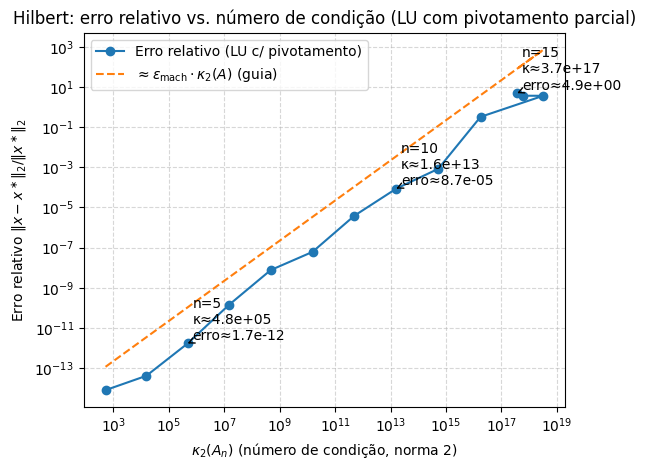

OBSERVAÇÕES (com referências):
1) κ₂(A) ↑ ⇒ erro relativo tende a ↑ (sensibilidade do problema) — Trefethen & Bau, Cap. 2.
2) Linha tracejada ≈ ε_mach·κ₂(A) dá ordem de grandeza do erro esperado — Higham (2002).
3) Valores acima da guia indicam crescimento numérico (growth factor) e arredondamento acumulado — Golub & Van Loan §3.3.
4) Pivotamento parcial é estável na prática, mas não corrige má-condição (Trefethen & Bau).


In [ ]:
# Plot
plt.figure()
plt.loglog(k2_vals, err_vals, marker='o', label='Erro relativo (LU c/ pivotamento)')
plt.loglog(k2_vals, guide, linestyle='--', label=r'$\approx \epsilon_{\mathrm{mach}}\cdot \kappa_2(A)$ (guia)')
plt.xlabel(r'$\kappa_2(A_n)$ (número de condição, norma 2)')
plt.ylabel(r'Erro relativo $\|x - x^\ast\|_2 / \|x^\ast\|_2$')
plt.title('Hilbert: erro relativo vs. número de condição (LU com pivotamento parcial)')
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.legend()

for n_mark in [5, 10, 15]:
    i = ns.index(n_mark)
    x = k2_vals[i]; y = err_vals[i]
    plt.annotate(f"n={n_mark}\nκ≈{x:.1e}\nerro≈{y:.1e}",
                 xy=(x, y),
                 xytext=(x*1.5, y*1.5),
                 arrowprops=dict(arrowstyle="->", lw=1))

plt.tight_layout()

plt.show()

print("OBSERVAÇÕES (com referências):")
print("1) κ₂(A) ↑ ⇒ erro relativo tende a ↑ (sensibilidade do problema) — Trefethen & Bau, Cap. 2.")
print("2) Linha tracejada ≈ ε_mach·κ₂(A) dá ordem de grandeza do erro esperado — Higham (2002).")
print("3) Valores acima da guia indicam crescimento numérico (growth factor) e arredondamento acumulado — Golub & Van Loan §3.3.")
print("4) Pivotamento parcial é estável na prática, mas não corrige má-condição (Trefethen & Bau).")